In [18]:
#Packages
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

#Py files
import MarketFunctions as NashMon
import QLearningAlgo as Q

## 1) Nash and Bertrand prices

In [6]:
pN = NashMon.Balayage(NashMon.f_Nash, 0, 0, 0.001)
print(pN)

1.4729999999999486


In [7]:
pM = NashMon.Balayage(NashMon.f_Mon, 0, 0, 0.001)
print(pM)

1.9249999999998988


## 2) Q-learning (remplacer avec le code par class)

Attention, cette opération peut être longue
Pour 
- 100 rep : < 1sec
- 1000 rep : < 1 sec
- 10000 rep : env. 4 sec
- 100000 rep : env. 40 sec
- 1000000 rep : env. 7mn

In [12]:
results1 = Q.jeu(pN=pN,pM=pM,Xi=0.1,m=15, A=Q.A, S=Q.S, epsilon = Q.epsilon, beta=10**(-5), alpha = 0.1, delta = 0.95, initQ=Q.initQwithLargeConstantValue, updateQ=Q.updateQ, nb_iteration=100, get_next_action = Q.get_next_action,trouve_max=Q.trouve_max,pi1=Q.pi1, pi2=Q.pi2, find_index=Q.find_index)

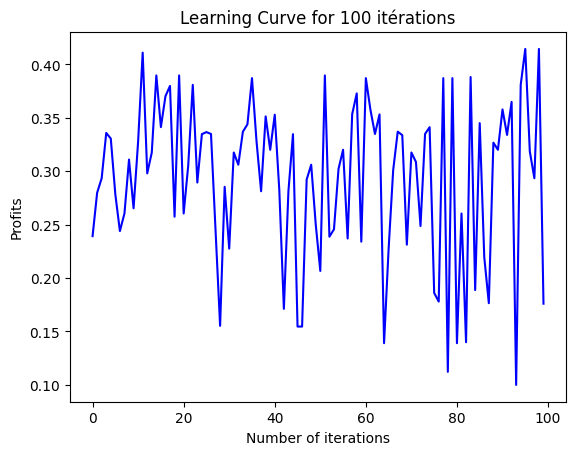

In [14]:
plt.title("Learning Curve for 100 itérations")
plt.plot(results1[1], results1[2], "b", label = "Simulation 1")
plt.xlabel('Number of iterations')
plt.ylabel('Profits')
plt.show()